In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

C:\Users\Sakshi Kothari\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Sakshi Kothari\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", matplotlib.__version__)

numpy: 1.26.4
pandas: 2.3.3
seaborn: 0.13.2
matplotlib: 3.9.4


In [3]:
from sqlalchemy import create_engine

username="postgres"
password="Sakshi0410"
host="localhost"
port="5432"
database="inventory"

#db_url = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}""

try:
    engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
    # Test the connection immediately (optional but recommended)
    with engine.connect() as connection:
        print("Successfully connected to PostgreSQL.")
except Exception as e:
    print(f"Error connecting to PostgreSQL: {e}")
    # You might want to exit the script here if connection fails
    exit()

Successfully connected to PostgreSQL.


In [4]:
df=pd.read_sql_query("select * from vendor_sales_summary",engine)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


### We will analyse to gain insights into distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality.

In [5]:
#summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


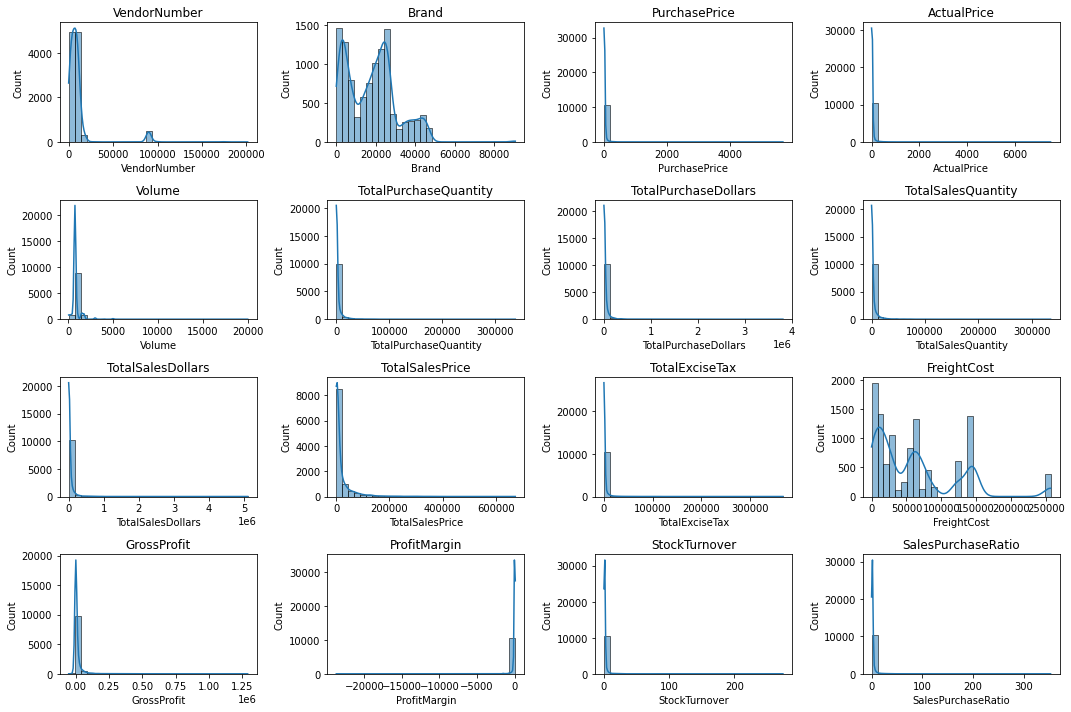

In [7]:
#histogram

numerical_cols = df.select_dtypes(include=np.number).columns

for col in df.select_dtypes(include=np.number).columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)

df.fillna(0, inplace=True)

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

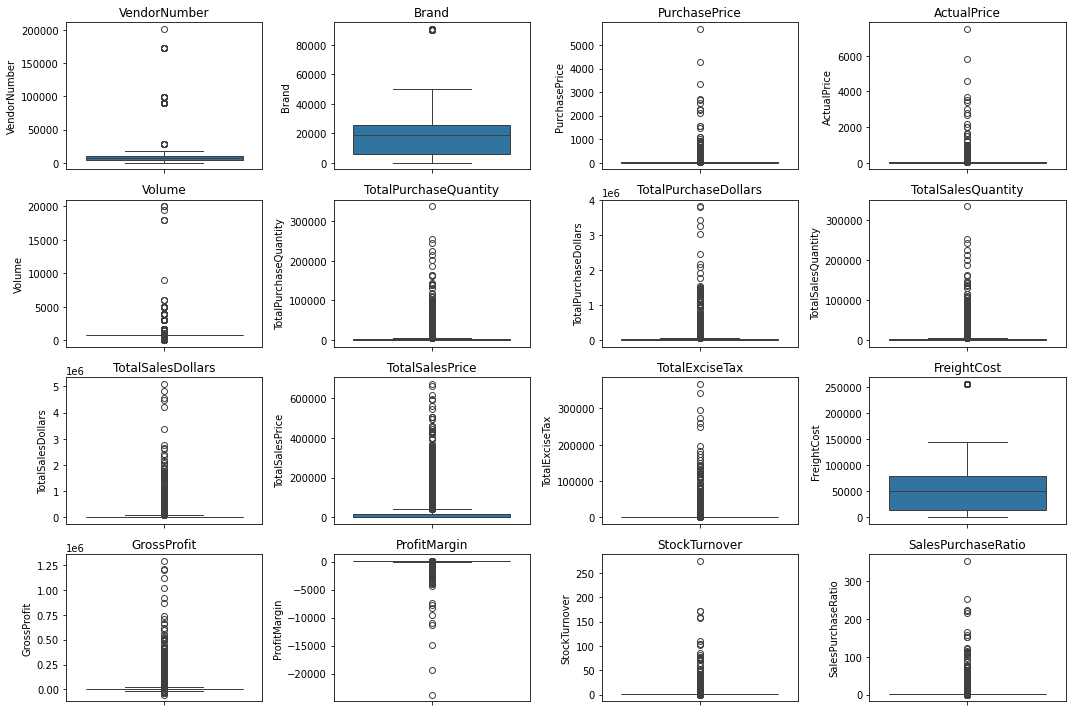

In [9]:
#boxplot for outliers
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Negative & Zero Values:

Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

### Outliers Indicated by High Standard Deviations:

Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely.

A value greater than 1 indicates that sold quantity for that product is higher than purchased quantity, possibly due to sales being fulfilled from older stock.

In [12]:
df=pd.read_sql_query('''
Select * from vendor_sales_summary
where "GrossProfit">0
AND "ProfitMargin">0
AND "TotalSalesQuantity">0
''',engine)


In [13]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2.0,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


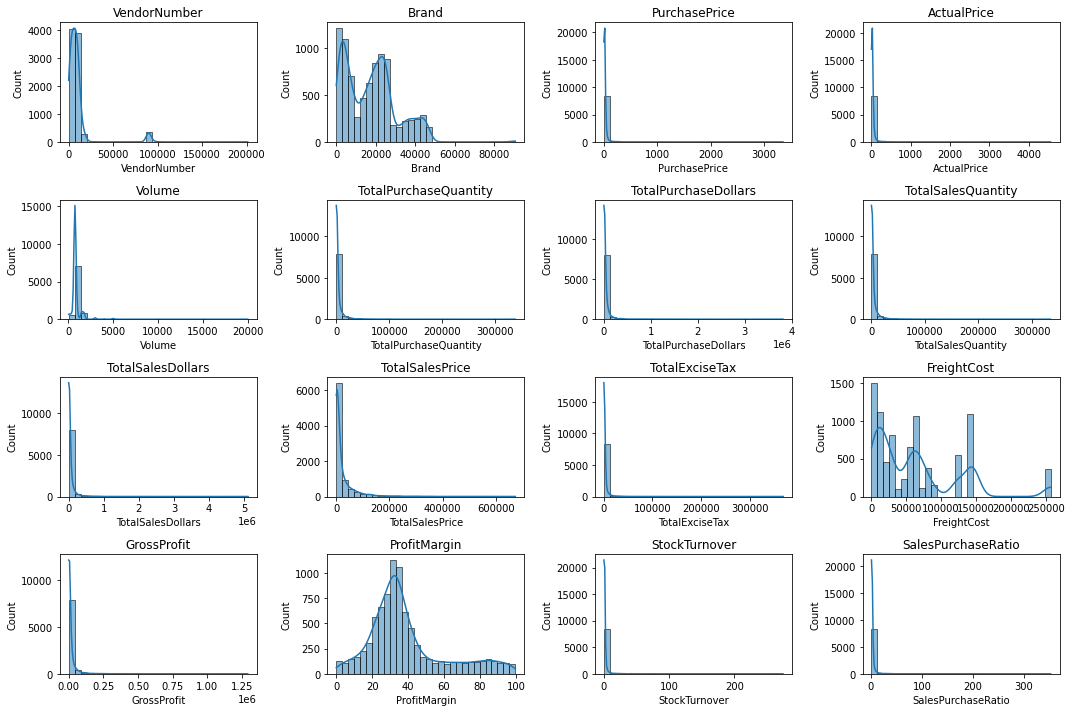

In [15]:
#histogram

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

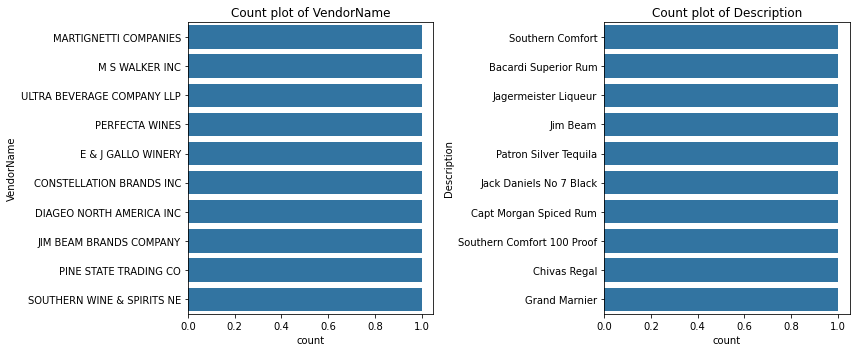

In [16]:
#Count Plots
categorical_cols=['VendorName','Description']
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col].value_counts().index[:10]) #top 10 categories
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

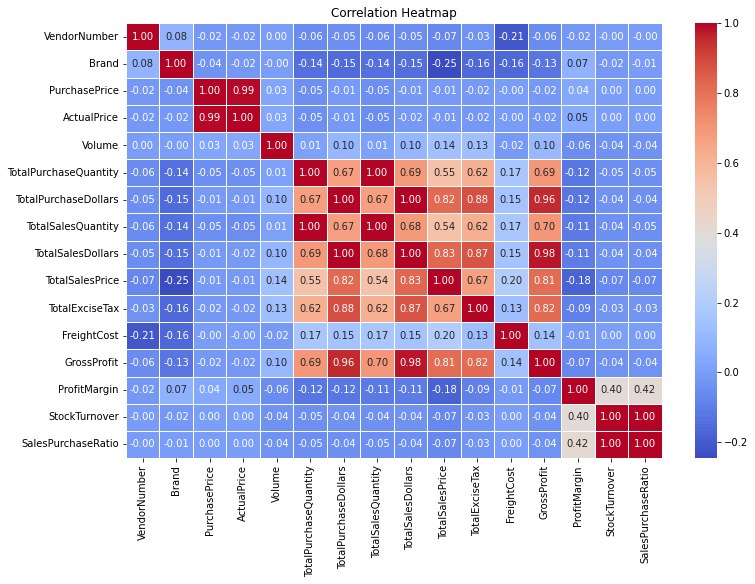

In [18]:
plt.figure(figsize=(12, 8))

# Calculate the Correlation Matrix for the relevant numerical columns
correlation_matrix = df[numerical_cols].corr() 

# Plot the Heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

#### Purchase Price variations do not significatnly impact sales revenue or profit

#### Strong correlation between purchase quantity and total sales quantity

#### As price increase, margins decrease

#### Faster turnover doesnt mean high profits

## Q1) Identify brands that needs promotional/pricing adjustments which exibit lower sales performance but higher profit margins

In [21]:
brand_perf=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [22]:
low_sales_threshold = brand_perf['TotalSalesDollars'].quantile(0.15)
high_profit_threshold = brand_perf['ProfitMargin'].quantile(0.85)

In [23]:
low_sales_threshold

560.299

In [24]:
high_profit_threshold

64.97017552750113

In [28]:
target_brands= brand_perf[
    (brand_perf['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_perf['ProfitMargin'] >= high_profit_threshold)   
]
print("Target Brands:")
display(target_brands.sort_values('TotalSalesDollars'))

Target Brands:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


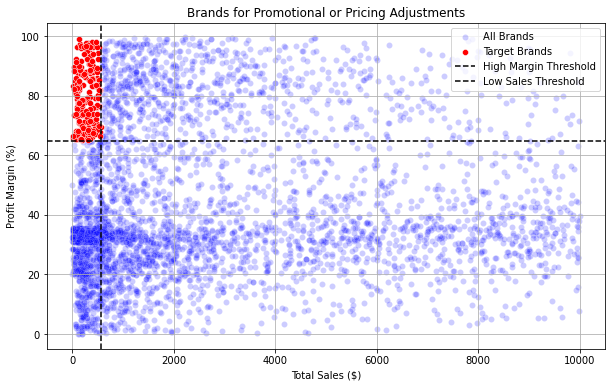

In [32]:
brand_perf=brand_perf[brand_perf['TotalSalesDollars']<10000]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot all brands (in blue, semi-transparent)
sns.scatterplot(data=brand_perf, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)

# Plot target brands (in red, fully visible)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

# Horizontal line for high profit margin threshold
plt.axhline(high_profit_threshold, linestyle='--', color='black', label="High Margin Threshold")

# Vertical line for low sales threshold
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

# Labels and Title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### Which vendors adn brands demonstrate the highest sales performance?

In [39]:
top_vendors=df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [37]:
def format_dollars(value):
    if value>=1_00_000:
        return f"{value/1_00_000:.2f}H"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [40]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    79.65H
Tito's Handmade Vodka      74.00H
Grey Goose Vodka           72.10H
Capt Morgan Spiced Rum     63.56H
Absolut 80 Proof           62.45H
Jameson Irish Whiskey      57.16H
Ketel One Vodka            50.70H
Baileys Irish Cream        41.50H
Kahlua                     36.05H
Tanqueray                  34.57H
Name: TotalSalesDollars, dtype: object

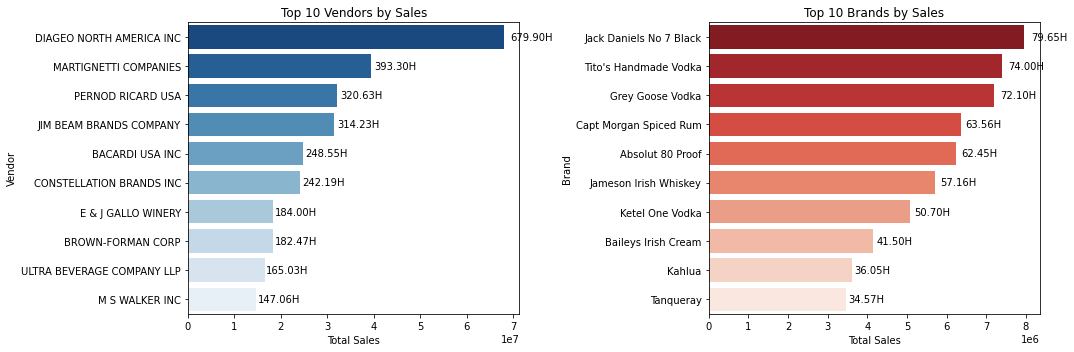

In [41]:
plt.figure(figsize=(15, 5))

# --- Subplot 1: Top 10 Vendors ---
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    palette="Blues_r"
)
plt.title("Top 10 Vendors by Sales")
plt.xlabel("Total Sales") 
plt.ylabel("Vendor")      

# Add value labels to the bars
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,        
        format_dollars(bar.get_width()),          
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# --- Subplot 2: Top 10 Brands ---
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
ax2 = sns.barplot(
    # Ensure index is treated as string for categorical axis
    y=top_brands.index.astype(str),
    x=top_brands.values,
    palette="Reds_r"
)
plt.title("Top 10 Brands by Sales")
plt.xlabel("Total Sales") 
plt.ylabel("Brand")       

# Add value labels to the bars
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,         
        format_dollars(bar.get_width()),            
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [43]:
vendor_perf=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [44]:
vendor_perf

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [58]:
vendor_perf['PurchaseContribution']=vendor_perf['TotalPurchaseDollars']/vendor_perf['TotalPurchaseDollars'].sum()*100

In [59]:
vendor_perf=round(vendor_perf.sort_values('PurchaseContribution',ascending=False),2)

In [60]:
vendor_perf.groupby('VendorName')['PurchaseContribution'].sum().nlargest(10)

VendorName
DIAGEO NORTH AMERICA INC      16.30
MARTIGNETTI COMPANIES          8.30
PERNOD RICARD USA              7.76
JIM BEAM BRANDS COMPANY        7.64
BACARDI USA INC                5.67
CONSTELLATION BRANDS INC       4.97
BROWN-FORMAN CORP              4.31
E & J GALLO WINERY             3.93
ULTRA BEVERAGE COMPANY LLP     3.63
M S WALKER INC                 3.18
Name: PurchaseContribution, dtype: float64

In [61]:
#top 10 vendors
top_vendors=vendor_perf.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,500.97H,178.93H,679.90H,16.30
57,MARTIGNETTI COMPANIES,255.02H,138.28H,393.30H,8.30
68,PERNOD RICARD USA,238.51H,82.12H,320.63H,7.76
46,JIM BEAM BRANDS COMPANY,234.94H,79.29H,314.23H,7.64
6,BACARDI USA INC,174.32H,74.23H,248.55H,5.67
20,CONSTELLATION BRANDS INC,152.74H,89.45H,242.19H,4.97
11,BROWN-FORMAN CORP,132.39H,50.08H,182.47H,4.31
30,E & J GALLO WINERY,120.69H,63.31H,184.00H,3.93
106,ULTRA BEVERAGE COMPANY LLP,111.67H,53.35H,165.03H,3.63
53,M S WALKER INC,97.64H,49.42H,147.06H,3.18


In [62]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,500.97H,178.93H,679.90H,16.30,16.30
57,MARTIGNETTI COMPANIES,255.02H,138.28H,393.30H,8.30,24.60
68,PERNOD RICARD USA,238.51H,82.12H,320.63H,7.76,32.36
46,JIM BEAM BRANDS COMPANY,234.94H,79.29H,314.23H,7.64,40.00
6,BACARDI USA INC,174.32H,74.23H,248.55H,5.67,45.67
20,CONSTELLATION BRANDS INC,152.74H,89.45H,242.19H,4.97,50.64
11,BROWN-FORMAN CORP,132.39H,50.08H,182.47H,4.31,54.95
30,E & J GALLO WINERY,120.69H,63.31H,184.00H,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,111.67H,53.35H,165.03H,3.63,62.51
53,M S WALKER INC,97.64H,49.42H,147.06H,3.18,65.69


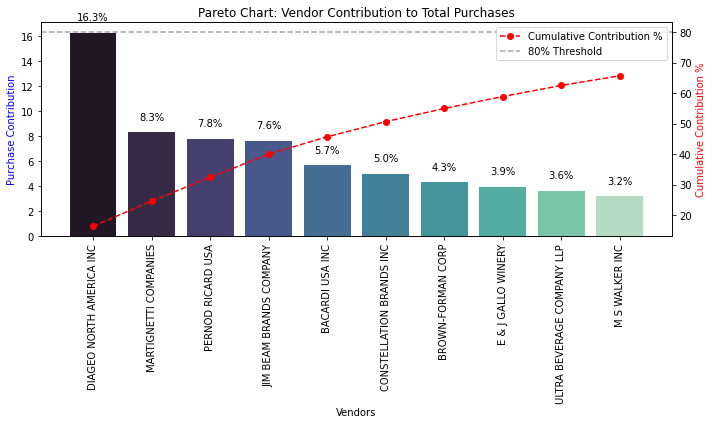

In [66]:
#Every vendor contri + cumulative contri of 10/all
fig, ax1 = plt.subplots(figsize=(10, 6))

# === Bar Plot for Purchase Contribution % (Primary Axis: ax1) ===
sns.barplot(
    x='VendorName', 
    y='PurchaseContribution', 
    data=top_vendors, 
    palette="mako", 
    ax=ax1
)

# Add data labels to the bars
for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(
        i, 
        value + 1, 
        f"{value:.1f}%", 
        ha='center', 
        fontsize=10, 
        color='black' 
    )

# === Line Plot for Cumulative Contribution % (Secondary Axis: ax2) ===
ax2 = ax1.twinx() 

ax2.plot(
    top_vendors['VendorName'], 
    top_vendors['Cumulative_Contribution%'], 
    color='red', 
    marker='o', 
    linestyle='dashed', 
    label='Cumulative Contribution %'
)

# === Formatting and Labels ===

# X-axis ticks: rotate labels on ax1 (which controls the x-axis)
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90) 

# Y-axis labels
ax1.set_ylabel('Purchase Contribution', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')

ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Add the 80/20 reference line (Pareto Principle threshold)
# Assuming 80 is the intended threshold based on typical Pareto charts.
ax2.axhline(80, color='gray', linestyle='dashed', alpha=0.7, label='80% Threshold') 

# Display the legend for the line plot
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### How much of total procurement is dependent on top vendors?

In [68]:
print(f'Total Purchase Contribution : {round(top_vendors["PurchaseContribution"].sum(), 2)}%')

Total Purchase Contribution : 65.69%


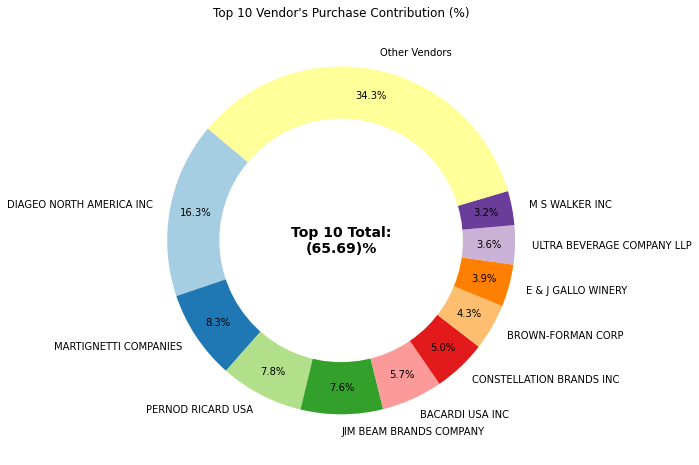

In [70]:
# --- Data Preparation ---
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution'].values)

# Calculate the contribution sum of the top vendors
total_contribution = sum(purchase_contributions)
# Calculate the remaining portion for "Other Vendors"
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category to the lists
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# --- Donut Chart Generation ---
fig, ax = plt.subplots(figsize=(8, 8))


wedges, texts, autotexts = ax.pie(
    purchase_contributions, 
    labels=vendors, 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=0.85, 
    colors=plt.cm.Paired.colors 
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 
    0, 
    f"Top 10 Total:\n({total_contribution:.2f})%", 
    fontsize=14, 
    fontweight='bold', 
    ha='center', 
    va='center'
)

# Set the title
plt.title("Top 10 Vendor's Purchase Contribution (%)")

plt.show()

### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?

In [71]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [75]:
df["OrderSize"] = pd.qcut(
    df['TotalPurchaseQuantity'],
    q=3,
    labels=["Small", "Medium", "Large"]
)

In [78]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080.0
1,Large,164038.0
2,Large,187407.0
3,Large,201682.0
4,Large,138109.0
...,...,...
8559,Small,2.0
8560,Small,6.0
8561,Small,2.0
8562,Small,1.0


In [79]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


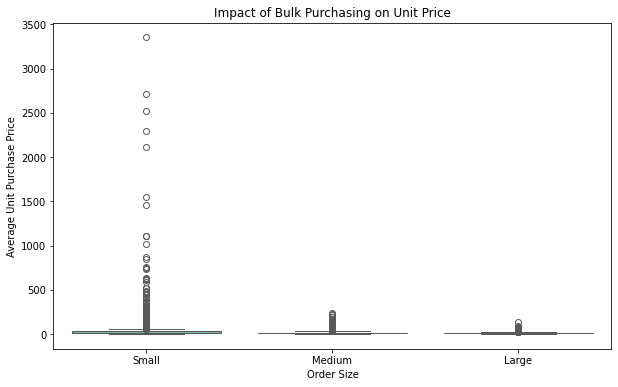

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

### Which vendors have low inventory turnover, indicating excess stock and slow-sell?

In [87]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### How much captial is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [88]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Captital', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Captital 27.08H


In [89]:
inventory_value_per_vendor=df.groupby('VendorName')["UnsoldInventoryValue"].sum().reset_index()

In [90]:
inventory_value_per_vendor

,VendorName,UnsoldInventoryValue
0,ADAMBA IMPORTS INTL INC,-91.52
1,ALISA CARR BEVERAGES,-43151.48
2,ALTAMAR BRANDS LLC,464.23
3,AMERICAN SPIRITS EXCHANGE,116.76
4,AMERICAN VINTAGE BEVERAGE,3672.17
...,...,...
114,WEIN BAUER INC,1732.03
115,WESTERN SPIRITS BEVERAGE CO,-949.61
116,WILLIAM GRANT & SONS INC,401960.83
117,WINE GROUP INC,86862.57


In [91]:
#sort vendors with highest locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values("UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,7.22H
46,JIM BEAM BRANDS COMPANY,5.55H
68,PERNOD RICARD USA,4.71H
116,WILLIAM GRANT & SONS INC,4.02H
30,E & J GALLO WINERY,2.28H
79,SAZERAC CO INC,1.98H
11,BROWN-FORMAN CORP,1.78H
20,CONSTELLATION BRANDS INC,1.34H
61,MOET HENNESSY USA INC,1.26H
77,REMY COINTREAU USA INC,1.19H


### What is 95% confidence intervals for profit margins of top performing and low performing vendors?

In [92]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

In [94]:
top_vendors=df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [96]:
low_vendors

1777    38.022627
2154    22.568162
5633     4.111764
5654     6.145626
5703    12.007271
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [100]:
def confidence_interval(data, confidence=0.95):
    mean_val=np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) 
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    lower_bound = mean_val - margin_of_error
    upper_bound = mean_val + margin_of_error
    return mean_val, lower_bound, upper_bound

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


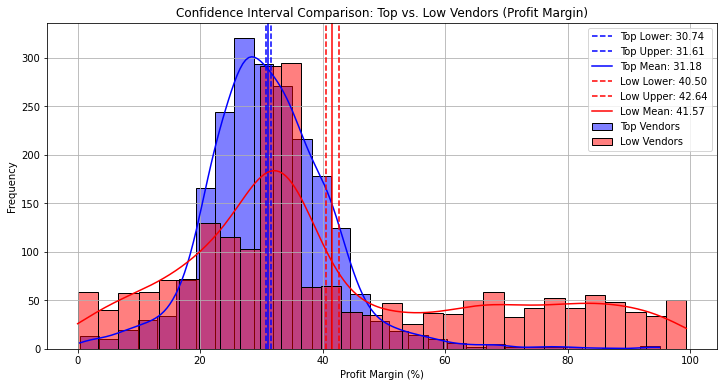

In [101]:
# --- 1. Confidence Interval Calculation ---
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# --- 2. Print Results ---
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# --- 3. Plot Setup ---
plt.figure(figsize=(12, 6))

# --- 4. Top Vendors Plot (Blue) ---
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
# Lower CI boundary
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
# Upper CI boundary
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
# Mean
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# --- 5. Low Vendors Plot (Red) ---
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
# Lower CI boundary
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
# Upper CI boundary
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
# Mean
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# --- 6. Finalize Plot ---
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### Is there a significant diff in profit margins between top and low performing vendors?

```
H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.
```

In [102]:
# Assuming ttest_ind is imported as: from scipy.stats import ttest_ind

# 1. Define Sales Thresholds
# Calculate the 75th percentile (top 25%) and 25th percentile (bottom 25%) of sales dollars
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

# 2. Separate Profit Margin Data for Top and Low Vendors
# Select profit margins for vendors above the top sales threshold
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
# Select profit margins for vendors below the low sales threshold
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# 3. Perform Two-Sample T-Test
# T-test for independent samples, assuming unequal variances (Welch's t-test)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# 4. Print Results and Conclusion
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
